In [10]:
import pandas as pd

pacientes = pd.read_csv('csv/Pacientes.csv')
print(pacientes)

     NOEXPED Enfermedad  HIPERTEN  HIPERGLU  HDLBAJA  HIPERTRI  CINTALTA  \
0          1         NO         0         0        1         0         0   
1          2         SI         0         1        1         1         1   
2          3         SI         1         1        0         1         1   
3          4         NO         1         1        0         0         0   
4          5         NO         0         0        1         0         0   
..       ...        ...       ...       ...      ...       ...       ...   
980      890         SI         1         1        1         0         0   
981      892         NO         0         0        0         0         0   
982      904         NO         1         0        1         1         0   
983      954         NO         1         0        1         0         0   
984      909         SI         1         0        0         1         1   

     EDAD  GENERO  FUMA  ALCOHOL  POLIURIA  
0      38       0     0        0         0

In [11]:
pacientes = pacientes.set_index("NOEXPED")
pacientes

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
890,SI,1,1,1,0,0,70,1,0,0,0
892,NO,0,0,0,0,0,39,0,0,0,0
904,NO,1,0,1,1,0,45,0,0,1,0


In [12]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [13]:
X = pacientes.iloc[:,1:11]
X

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
890,1,1,1,0,0,70,1,0,0,0
892,0,0,0,0,0,39,0,0,0,0
904,1,0,1,1,0,45,0,0,1,0


In [17]:
y = pacientes.iloc[:,0].replace({'SI':1, 'NO':0})
y

/tmp/ipykernel_147295/876562977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = pacientes.iloc[:,0].replace({'SI':1, 'NO':0})


NOEXPED
1      0
2      1
3      1
4      0
5      0
      ..
890    1
892    0
904    0
954    0
909    1
Name: Enfermedad, Length: 985, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
682,0,0,1,0,0,40,1,0,0,0
822,0,0,1,1,1,45,0,0,1,0
405,1,0,1,0,1,46,1,0,0,0
799,0,0,0,1,1,79,0,0,1,0
720,0,0,0,0,0,35,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
189,0,1,0,1,0,40,1,1,0,0
388,0,0,0,0,0,18,0,0,0,0
457,0,0,1,0,0,44,0,0,0,0


In [22]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier(max_depth=5)
arbol = arbol.fit(X_train, y_train)

In [23]:
arbol_precision = arbol.score(X_test, y_test)
print('Precisión del árbol de decisión:', arbol_precision)

Precisión del árbol de decisión: 0.9628378378378378


In [25]:
Y_pred = arbol.predict(X_test)
print(Y_pred)

[0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

arbol_exactitud = accuracy_score(y_test, Y_pred)
arbol_exactitud

0.9628378378378378

In [29]:
from sklearn.metrics import confusion_matrix
arbol_matriz = confusion_matrix(y_test, Y_pred)
print(arbol_matriz)

[[200   4]
 [  7  85]]


In [31]:
from sklearn.metrics import classification_report

reporte_arbol = classification_report(y_test, Y_pred)
print(reporte_arbol)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       204
           1       0.96      0.92      0.94        92

    accuracy                           0.96       296
   macro avg       0.96      0.95      0.96       296
weighted avg       0.96      0.96      0.96       296



In [45]:
from sklearn.svm import SVC

svm_modelo = SVC(kernel='linear')
svm_modelo.fit(X_train, y_train)


SVC(kernel='linear')

In [46]:
svm_predic = svm_modelo.predict(X_test)
svm_predic

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [52]:
svm_presicion = accuracy_score(y_test, svm_predic)
print('SVM accuracy: ', svm_presicion)

SVM accuracy:  0.9763513513513513


In [53]:
from sklearn.metrics import confusion_matrix
svm_matriz = confusion_matrix(y_test, svm_predic)
print(svm_matriz)

[[202   2]
 [  5  87]]


In [54]:
reporte_svm = classification_report(y_test, svm_predic)
print(reporte_svm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       204
           1       0.98      0.95      0.96        92

    accuracy                           0.98       296
   macro avg       0.98      0.97      0.97       296
weighted avg       0.98      0.98      0.98       296



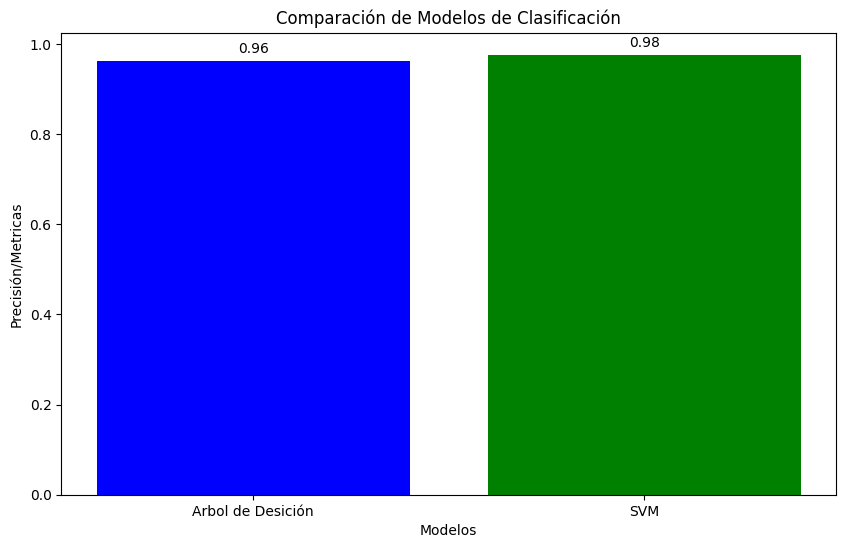

In [61]:
import matplotlib.pyplot as plt

modelos = ['Arbol de Desición', 'SVM']
metricas = [arbol_exactitud, svm_presicion]
plt.figure(figsize=(10, 6))
plt.bar(modelos, metricas, color=['b', 'g'])
plt.xlabel('Modelos')
plt.ylabel('Precisión/Metricas')
plt.title('Comparación de Modelos de Clasificación')

for i in range(len(modelos)):
    plt.text(i, metricas[i] + 0.01, str(round(metricas[i], 2)), ha='center', va='bottom')
             
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(random_state=42)

In [101]:
from sklearn.model_selection import GridSearchCV

parametros = {"criterion": ('gini', 'entropy'),
              'n_estimators': (10, 20, 30),
              'max_samples': (0.7, 0.3)
              }

In [102]:
tuning = GridSearchCV(bosque, parametros, scoring='f1')
tuning.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_samples': (0.7, 0.3),
                         'n_estimators': (10, 20, 30)},
             scoring='f1')

In [103]:
mejor_modelo = tuning.best_estimator_
mejor_modelo

RandomForestClassifier(criterion='entropy', max_samples=0.7, n_estimators=30,
                       random_state=42)

In [104]:
# Datos de prueba para el bosque
pacientes2 = pacientes.sample(frac=1/3, replace=True, random_state=42)
X_test_bosq = pacientes2.iloc[:,1:11]
X_test_bosq
y_test_bosq = pacientes2.iloc[:,0].replace({'SI':1,'NO':0})
y_test_bosq


/tmp/ipykernel_147295/3730803464.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_bosq = pacientes2.iloc[:,0].replace({'SI':1,'NO':0})


NOEXPED
185    0
726    0
457    0
388    0
189    0
      ..
756    1
621    1
272    0
969    0
265    1
Name: Enfermedad, Length: 328, dtype: int64

In [105]:
bosque_predic = mejor_modelo.predict(X_test_bosq)
bosque_predic

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [106]:
bosque_presicion = accuracy_score(y_test_bosq, bosque_predic)
bosque_presicion

0.9969512195121951

In [108]:
bosque_matriz = confusion_matrix(y_test_bosq, bosque_predic)
bosque_matriz

array([[235,   0],
       [  1,  92]])

In [109]:
reporte_bosque = classification_report(y_test_bosq, bosque_predic)
print(reporte_bosque)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      0.99      0.99        93

    accuracy                           1.00       328
   macro avg       1.00      0.99      1.00       328
weighted avg       1.00      1.00      1.00       328



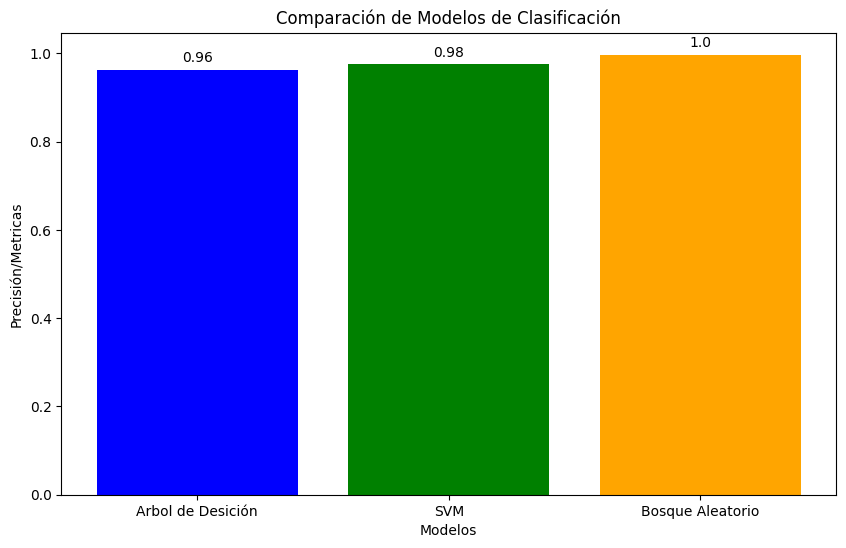

In [111]:
import matplotlib.pyplot as plt

modelos = ['Arbol de Desición', 'SVM', 'Bosque Aleatorio']
metricas = [arbol_exactitud, svm_presicion, bosque_presicion]
plt.figure(figsize=(10, 6))
plt.bar(modelos, metricas, color=['b', 'g', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('Precisión/Metricas')
plt.title('Comparación de Modelos de Clasificación')

for i in range(len(modelos)):
    plt.text(i, metricas[i] + 0.01, str(round(metricas[i], 2)), ha='center', va='bottom')
             
plt.show()